# A K-Prototypes Case Study 

## Erik Case

## Why Cluster?

Keep in mind that humans constantly and automatically cluster with the sensory data we ingest every day.
You are constantly categorizing like objects and phenomena that you see, hear, smell and taste every day.
<br>The task gets extremely difficult when you are trying to group many rows (observations) and many features (columns).  The mind isn't able to automatically do the same with a data set of any meaningful size.


_"Efficient partitioning of large data sets into homogeneous clusters is a fundamental problem in  data mining" -Huang, 1997_
<br>Similar to many tasks of machine learning, clustering aims to mimic the mind's process, but formally and on a larger scale.

<img src="one_of_these_things.png">



## Business Applications of Observational Clustering 

#### 1.  Initial Exploratory Data Analysis/Reporting: How many naturally occurring groups exist within the data?
<br> a. Helpful for first pass analysis of data where the idea is to find the 'like' groups that exist in the data
<br> b. Research question may be something vague like "We want to get a feel for the data."
<br> c. This should be in the EDA toolkit of every analyst because it is a LESS ARBITRARY method of categorizing things than, say:
<br> _i. Cut all observations up into thirds based on one variable and call it "Low/Medium/High"_
<br> _ii. Cutting things into deciles (I hate this)_
<br> _iii. Look at (low spend + high frequency) vs (high spend + high frequency)  vs (low spend + low frequency) vs (high spend + low frequency) customer quadrants_ 
<br> _iv. Pure Domain knowledge alone - "I noticed that people generally above this threshold tend to behave differently from other groups" or 
"These ones here (gestures at chart) are bottom feeders" -(actual quote from a high powered executive from a company I do not work for)_

<br>Note that some of the traditional ways of partitioning up a dataset are based on one or two metrics tops

#### 2.  Feature engineering  for a model that will eventually include a the cluster labels as an independent variable
a. Interestingly, when you are assigning cluster membership to row-wise observations, you have essentially  engineered a new, condensed and discrete representation of your feature set.

b. In that way, row-wise clustering actually has some of the effective characteristics of columnwise clustering. By paritioning the rows into discrete groups, you have mapped multiple columns into a single feature

#### 3.  Target engineering 
 Once natural categories have been detected in the data, can I then use them as my Y and predict future membership in that cluster?

### Traditional K-Means Algorithm

#### Goal: I want to partition my data set into _'k'_ number of clusters. The clusters should be the 'most' same internally and 'most different' _from each other_

How do we measure internal homegenity and external separation (aka 'distance')?
 The goal, more formally out, is to find the means of 'k' clusters (centroids) such that we minimize the Euclidean within cluster distance:


<img src="minimize_within_cluster_variance.png">


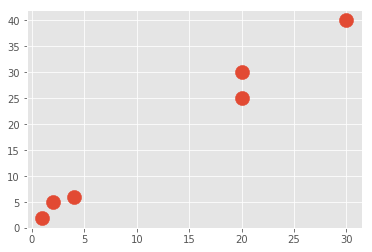

In [73]:
##Creating a two dimensional feature set with obvious clusters
X = np.array([[1, 2],
              [4, 6],
              [2, 5 ],
              [20, 25],
              [20, 30],
              [30, 40] ])

plt.scatter(X[:,0], X[:,1], s=200)
plt.show()


## Steps in the K-Means Algorithm
As defined above, the K-Means algorithm is iterative an can be described in the following steps:

1. Inintialize randomly selected means for the specified number of $k$ clusters
2. Calculate the Euclidean distance between _all_ observations to _all_ cluster centers
3. Assign each observation to the cluster that it is closest to
4. Take the average of the features by cluster, these are your new cluster means
5. Repeat steps 2 through 4 until cluster membership becomes stable




In [6]:
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/BVFG7fd1H30" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

# So what is the problem?

In real world data sets we often have data that is categorical and extremely useful. Maybe the categories are a string like 'Red, 'Blue', 'Green.' 
<br><br>_Even_ if you have done your ML pre-processsing and one hot encoded all your dummies into binary numeric, 1/0 columns, you _still_ have a problem.
<br> This problem is easy to miss because most K-Means implementations will take your integer dummy variable and not throw back an error.


Does the value of a dummy encoded '1' actually have any magnitudinal (_made up word, but you feel me?_) distance from '0'?  Or maybe you have encoded your binaries as '-1' or '1'. <br><br>
_"Is the Euclidean distance between 1 and 0, between -1 and 1, or between "Red" and "Green" relevant or even calculable?"_ - The Great Nick Fusaro

## Let's ilustrate this problem by tweaking our two dimensional array to include a numeric continuous with a numeric dummy

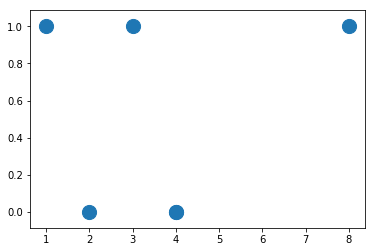

In [6]:
##Creating a two dimensional feature set a dummy variable
import matplotlib.pyplot as plt 
%matplotlib inline
X = np.array([
              [1, 1],
              [4, 0],
              [2, 0],
              [3, 1],
              [4, 0],
              [8, 1] ])

plt.scatter(X[:,0], X[:,1], s=200)
plt.show()

### ^ The intuitiveness of Euclidean distance starts to fall apart here

### Now try and intuit the Euclidean distance between an array with _two_ dummy variables

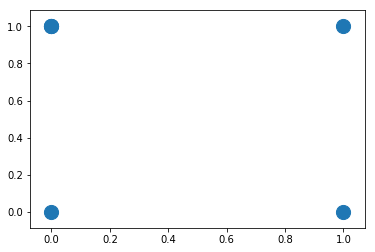

In [5]:
##Creating a two dimensional feature set with two dummy variables
X = np.array([
              [0, 1],
              [1, 0],
              [1, 1],
              [0, 1],
              [0, 0],
              [0, 1] ])

plt.scatter(X[:,0], X[:,1], s=200)
plt.show()

#### ^WTH does that even mean?
The summed distances between any means in these examples have no relevancy <br>
<br> As (Chandola et. al. 2007) wrote, _"The key characteristic of categorical data is that different values that a categorical attribute takes are not inherently ordered."_   

## Measures of Similarity for Categorical Variables
There is, however, a rich body of work across several discplines that deal with the problem of categorical similarity. The (still) well used Chi-Sq statistic is a venerable technique derived in the 1800's for probabilistically comparing categorical contingency tables. <br><br> Several of the approaches look at the mismatches and overlaps between categories. One of those is measures of overlap is called _Hamming Distance_, which itself uses the _Kronecker Delta_ :

<img src="kroenecker_delta.png">

Simply put, the _Kronecker Delta_ returns a 1 if two symbols match and a 0 if they do not.

## K-Prototypes (Huang 1997)

Huang (1997) stitched together a solution that accounts for numeric data using _K Means_ and a reversed _Kronecker Delta_ to compute similarity (or it's inverse, which is dissimilarity):


He did it, he really did it, a reverse Kronecker:

<img src="kproto_marked.png">

It is almost algorithmically identical to traditional K-Means, except now you are maximizing within cluster similarity that includes a chunk that measures the 'categorical lean' of each cluster.

## Back to Why This Matters

The TL;DR of this is that people who should know better abuse K-Means by throwing categorical variables in the mix as one hot encoded binary fields. People who do know better often are faced with a choice to follow best practices and drop those variables from the K-Means algorithm, losing valuable information. K-Modes offers an alternate approach that allows you to capture this information.

In terms of data science projects, my experience with this followed a familiar pattern:<br>

2. Hmm I want to do that but I can't or shouldn't. Maybe someone else has ran into this problem. 
3. Google
3. Days of reading possible solutions
4. Days of implementing possible solutions
5. Repeat steps 3 and 4 until convergence or vacation
6. Present the findings in a business context and leave out most of the technical stuff that is really the most interesting part to me

## A Case Study Using a Python Implementation of K-Modes

Niko DeVos created implementations of both


### Sources: 
 https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/ <br>
 https://pdfs.semanticscholar.org/d42b/b5ad2d03be6d8fefa63d25d02c0711d19728.pdf <br>
 https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/ <br>
 https://www.researchgate.net/publication/267680144_Similarity_Measures_for_Categorical_Data-A_Comparative_Study_Similarity_Measures_for_Categorical_Data-A_Comparative_Study <br>
 https://github.com/nicodv/kmodes#huang97

               